In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## Task 1

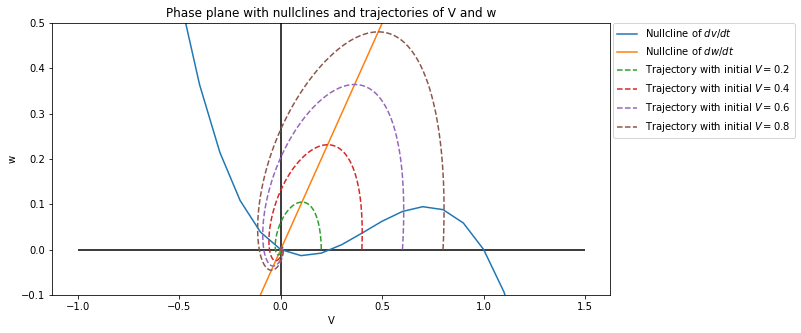

In [3]:
vs = np.arange(-1,1.5,0.1)

f1 = vs*(0.25-vs)*(vs-1)
f2 = vs

ts = np.arange(0,100,0.01)

def func(ini, t):
    v,w = ini
    dvdt = v*(0.25-v)*(v-1)-w
    dwdt = 1*(v-w)
    return dvdt,dwdt


res = scipy.integrate.odeint(func, [1,1], ts)
v = [i[0] for i in res]
w = [i[1] for i in res]

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(vs,f1,label='Nullcline of $dv/dt$')
ax.plot(vs,f2,label='Nullcline of $dw/dt$')
ax.hlines(0,-1,1.5)
ax.vlines(0,-1,2.5)
ax.set(title='Phase plane with nullclines and trajectories of V and w',
          ylabel='w',
          xlabel='V',
      ylim=(-0.1,0.5))

for i in [(0.2,0),(0.4,0),(0.6,0),(0.8,0)]:
    res = scipy.integrate.odeint(func, i, ts)
    v = [i[0] for i in res]
    w = [i[1] for i in res]
    ax.plot(v, w, linestyle='dashed', label=f'Trajectory with initial $V={i[0]}$')
ax.legend(bbox_to_anchor=(1.33, 1), borderaxespad=0)

plt.show()
#plt.savefig('Nullclines.pdf', bbox_inches='tight')

## Task 2

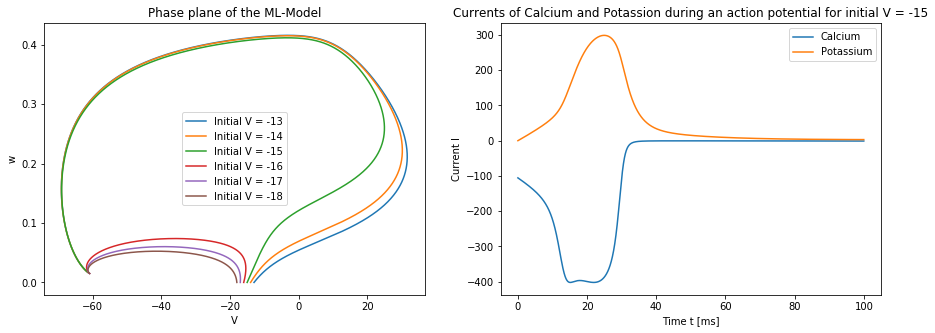

In [4]:
ts = np.arange(0,100,0.01)

V1 = -1.2 # [mV]
V2 = 18 # [mV]
V3 = 2 # [mV]
V4 = 30 # [mV]
VK = -84 # [mV]
VL = -60 # [mV]
VCa = 120 # [mV]
gK = 8 # [mS/cm^2]
gL = 2 # [mS/cm^2]
gCa = 4.4 # [mS/cm^2]
Cm = 20 # [mikroFarad/cm^2]
phi = 0.04 

def func(ini, t):
    V,w = ini
    
    minf = (1/2)*(1+np.tanh((V-V1)/V2))
    winf = (1/2)*(1+np.tanh((V-V3)/V4))
    tau = 1/(np.cosh((V-V3)/(2*V4)))
    ICa = gCa*minf*(V-VCa)
    IK = gK*w*(V-VK)
    IL = gL*(V-VL)
    
    dvdt = (-ICa-IK-IL)/Cm
    dwdt = phi*((winf-w)/tau)
    return dvdt,dwdt

res15 = scipy.integrate.odeint(func, [-15,0], ts)
V15 = [i[0] for i in res15]
w15 = [i[1] for i in res15]

minf = (1/2)*(1+np.tanh((np.array(V15)-V1)/V2))
ICa = gCa*minf*(np.array(V15)-VCa)
IK = gK*np.array(w15)*(np.array(V15)-VK)

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

inVs = [-13,-14,-15,-16,-17,-18]

for inV in inVs:
    res = scipy.integrate.odeint(func, [inV,0], ts)
    V = [i[0] for i in res]
    w = [i[1] for i in res]
    axs[0].plot(V, w, label=f'Initial V = {inV}')
axs[0].legend(loc='best')
axs[0].set(title='Phase plane of the ML-Model',
          ylabel='w',
          xlabel='V')

axs[1].plot(ts, ICa, label='Calcium')
axs[1].plot(ts, IK, label='Potassium')
axs[1].legend(loc='best')
axs[1].set(title='Currents of Calcium and Potassion during an action potential for initial V = -15',
          ylabel='Current I',
          xlabel='Time t [ms]')

plt.show()
#plt.savefig('action_potential.png', bbox_inches='tight')

## Task 3

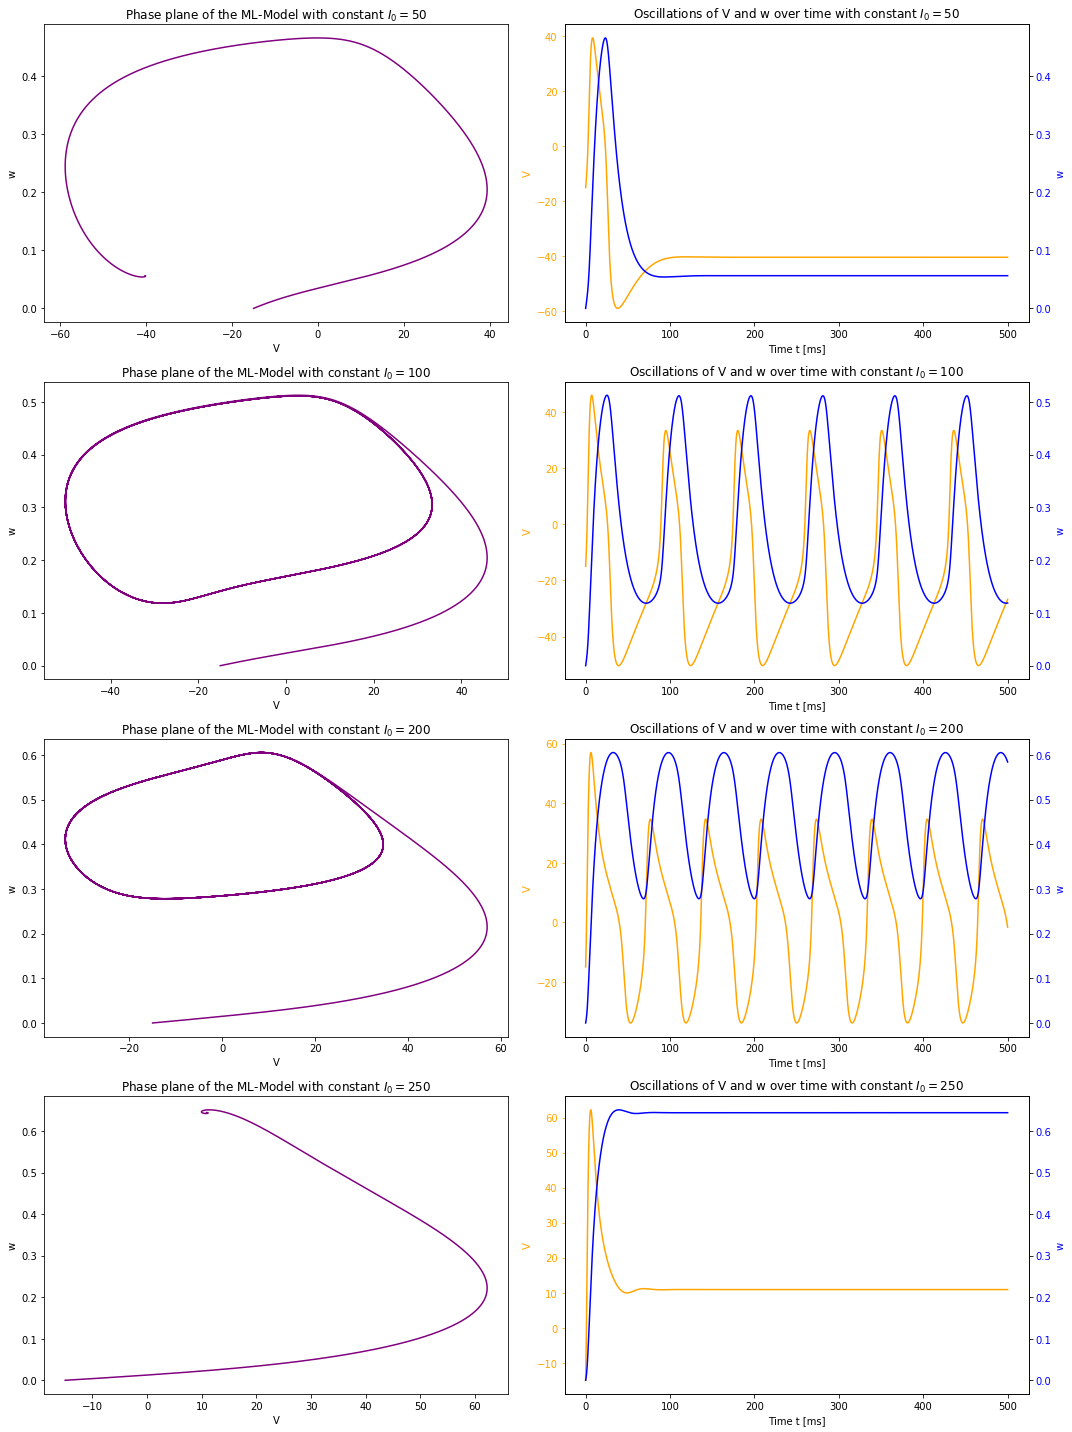

In [5]:
ts = np.arange(0,500,0.01)

def func(ini, t):
    V,w = ini
    
    minf = (1/2)*(1+np.tanh((V-V1)/V2))
    winf = (1/2)*(1+np.tanh((V-V3)/V4))
    tau = 1/(np.cosh((V-V3)/(2*V4)))
    ICa = (-gCa)*minf*(V-VCa)
    IK = gK*w*(V-VK)
    IL = gL*(V-VL)
    
    dvdt = ((ICa-IK-IL+I)/Cm)
    dwdt = phi*((winf-w)/tau)
    return dvdt,dwdt

fig,axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for index,I in enumerate([50,100,200,250]):
    res = scipy.integrate.odeint(func, [-15,0], ts)
    V = [i[0] for i in res]
    w = [i[1] for i in res]
    axs[index,0].plot(V, w, color='purple')
    axs[index,0].set(title=f'Phase plane of the ML-Model with constant $I_0={I}$',
               ylabel='w',
               xlabel='V')
    
    axs[index,1].plot(ts, V, color='orange')
    axs[index,1].set_ylabel('V', color='orange')
    axs[index,1].tick_params(axis='y', colors='orange')
    axy2 = axs[index,1].twinx()
    axy2.plot(ts, w, color='blue')
    axy2.set_ylabel('w', color='blue')
    axy2.tick_params(labelcolor='blue')
    axs[index,1].set(title=f'Oscillations of V and w over time with constant $I_0={I}$',
                     xlabel='Time t [ms]')
fig.tight_layout()

plt.show()
#plt.savefig('oscillations.png', bbox_inches='tight')

## Task 4

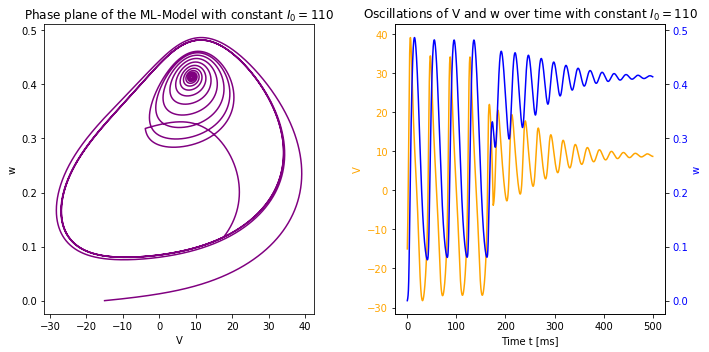

In [6]:
ts = np.arange(0,500,0.01)

V1 = -1.2 # [mV]
V2 = 18 # [mV]
V3 = 12 # [mV]
V4 = 17.4 # [mV]
VK = -84 # [mV]
VL = -60 # [mV]
VCa = 120 # [mV]
gK = 8 # [mS/cm^2]
gL = 2 # [mS/cm^2]
gCa = 4.0 # [mS/cm^2]
Cm = 20 # [mikroFarad/cm^2]
phi = 0.0667
I = 110 # [mikroAmpere/cm^2]
Icrit = 140 # [mikroAmpere/cm^2]

def func(ini, t):
    V,w = ini
    
    minf = (1/2)*(1+np.tanh((V-V1)/V2))
    winf = (1/2)*(1+np.tanh((V-V3)/V4))
    tau = 1/(np.cosh((V-V3)/(2*V4)))
    ICa = gCa*minf*(V-VCa)
    IK = gK*w*(V-VK)
    IL = gL*(V-VL)
    if t > 165 and t < 175:
        dvdt = (-ICa-IK-IL+I-Icrit)/Cm
        dwdt = phi*((winf-w)/tau)
    else:
        dvdt = (-ICa-IK-IL+I)/Cm
        dwdt = phi*((winf-w)/tau)
    return dvdt,dwdt

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

res = scipy.integrate.odeint(func, [-15,0], ts)
V = [i[0] for i in res]
w = [i[1] for i in res]
axs[0].plot(V, w, color='purple')
axs[0].set(title=f'Phase plane of the ML-Model with constant $I_0={I}$',
        ylabel='w',
        xlabel='V')

axs[1].plot(ts, V, color='orange')
axs[1].set_ylabel('V', color='orange')
axs[1].tick_params(axis='y', labelcolor='orange')
axs[1].set(title=f'Oscillations of V and w over time with constant $I_0={I}$',
                 xlabel='Time t [ms]')
axy = axs[1].twinx()
axy.plot(ts, w, color='blue')
axy.set_ylabel('w', color='blue')
axy.tick_params(labelcolor='blue')

fig.tight_layout()

plt.show()
#plt.savefig('black_hole.png', bbox_inches='tight')

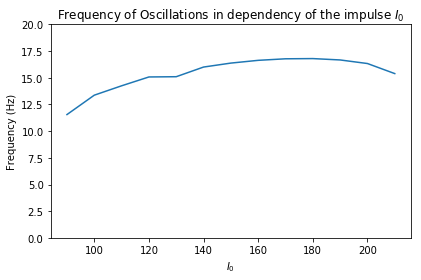

In [12]:
ts = np.arange(0,500,0.01)

V1 = -1.2 # [mV]
V2 = 18 # [mV]
V3 = 2 # [mV]
V4 = 30 # [mV]
VK = -84 # [mV]
VL = -60 # [mV]
VCa = 120 # [mV]
gK = 8 # [mS/cm^2]
gL = 2 # [mS/cm^2]
gCa = 4.4 # [mS/cm^2]
Cm = 20 # [mikroFarad/cm^2]
phi = 0.04
Is = np.arange(90,220,10) # [mikroAmpere/cm^2]

def func(ini, t):
    V,w = ini
    
    minf = (1/2)*(1+np.tanh((V-V1)/V2))
    winf = (1/2)*(1+np.tanh((V-V3)/V4))
    tau = 1/(np.cosh((V-V3)/(2*V4)))
    ICa = gCa*minf*(V-VCa)
    IK = gK*w*(V-VK)
    IL = gL*(V-VL)
    
    dvdt = (-ICa-IK-IL+I)/Cm
    dwdt = phi*((winf-w)/tau)
    return dvdt,dwdt

fig,ax = plt.subplots()

finfrq = []
for I in Is:
    res = scipy.integrate.odeint(func, [-15,0], ts)
    V = [i[0] for i in res]
    w = [i[1] for i in res]
    mnn = 10
    i = 0
    per = [0]
    while i < len(V)-1:
        if round(V[i],0) == round(mnn,0):
            per.append(i)
            while round(V[i],0) == round(mnn,0) and i < len(V)-1:
                i += 1
        else:
            i += 1
    prn = [per[i]-per[i-1] for i in range(1,len(per))]
    frq = len(V)/np.mean(prn)
    finfrq.append(frq)

ax.plot(Is, finfrq)
ax.set(title='Frequency of Oscillations in dependency of the impulse $I_0$',
        ylabel='Frequency (Hz)',
        xlabel='$I_0$',
      ylim=(0,20))

fig.tight_layout()

plt.show()
#plt.savefig('frequency.png', bbox_inches='tight')